# Plotting and Visualization

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
%pwd

'c:\\dev_python\\pydata-book-1st-edition'

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## A brief matplotlib API primer

In [5]:
import matplotlib.pyplot as plt

### Figures and Subplots

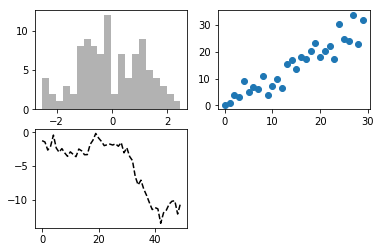

In [32]:
fig = plt.figure()
#subplot(2,2,1)에서 1은 첫번째 위치에 나타내겠다느거임
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

from numpy.random import randn
#가장 최근에 그림을 그렸거나 활성화된 또는 만들었던 subplot을 그리게 됨.
#따라서 밑에 ax3을 실행시키지 않았지만 출력된건 이 plt.plot때문
#- -는 선 스타일을 점선으로 함. marker는..??
plt.plot(randn(50).cumsum(), 'k--')

#randn은 100개의 랜덤한 데이터, bins는 구간을 20개로 한다는 것 
#k는 black, alpha는 투명도! 검은색의 투명도 0.3하면 회색됨. 1일때 불투명, 0이면 투명
#_는 일회성 변수로 사용하겠다는 뜻. 즉, 한 번 실행하는 용도로 사용.
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
#scatter는 산점도!
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

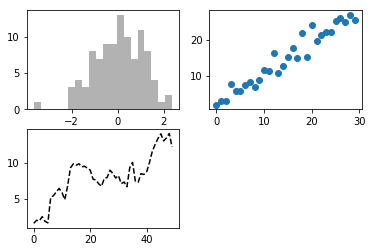

In [14]:
fig

In [15]:
ax1

In [33]:
plt.close('all')    # matlplotlib inline 에서는 close() 필요없음. console에서 할 때 필요한거임.

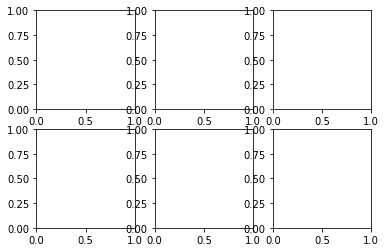

In [34]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots
# wspace는 subplot간의 너비간격, hspace는 subplot간의 수직간격
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

In [35]:
InteractiveShell.ast_node_interactivity = 'last'    # 별도의 셀에서 수행되어야 함

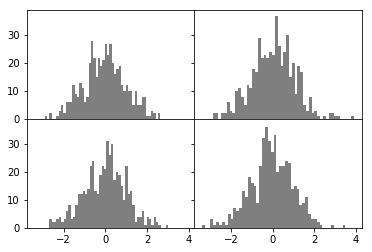

In [38]:
#sharex와 sharey는 축을 공유하는지 따로 할지에 대해 나타냄
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

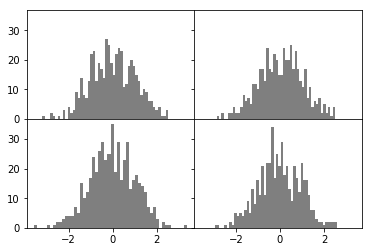

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

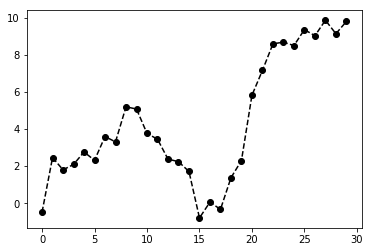

In [40]:
plt.figure()
#ko--는 k는 black o는 marker style(점이찍힘) - -는 점선!
#plt.plot(randn(30).cumsum(), color = 'k', linestyle='dashed',marker='0')로 쓸 수 있음. 아래와 동일함
plt.plot(randn(30).cumsum(), 'ko--')

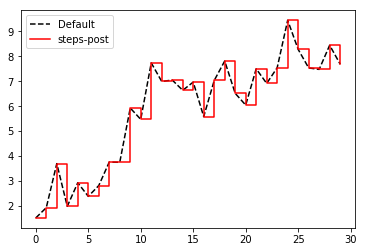

In [43]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
#-는 실선을 의미함. - - 는 점선.
#drawstyle은 점과 점을 연결하는건데 두 steps-post는 계단식으로 나타낸다는거임. 
#단, post이므로, 그 뒤에 그려짐
#steps-pre로 하면 반대가 됨.
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5,0,'Stages')

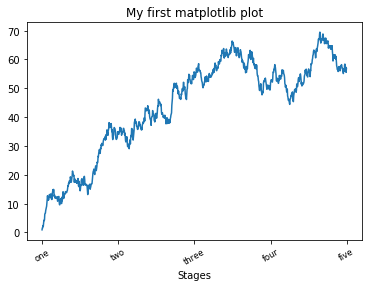

In [50]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

#tick은 축에 나타나는 눈금의 값을 나타낸다. xticks는 x축에 나타나는 값을 나타내며, xticklabels는 수정값을 나타낸다
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

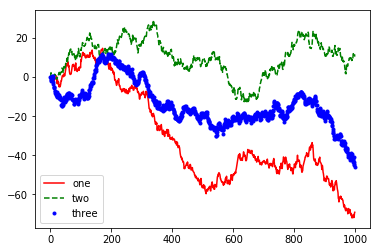

In [54]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'r', label='one')
#g는 green
ax.plot(randn(1000).cumsum(), 'g--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

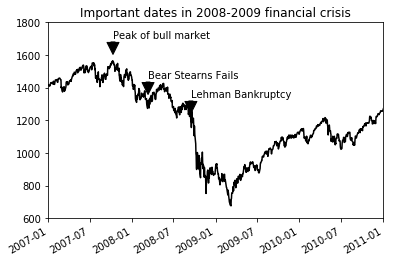

In [55]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

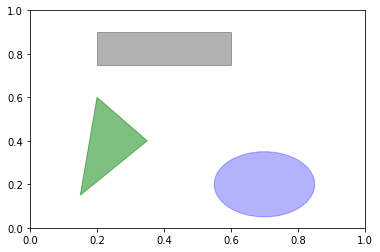

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

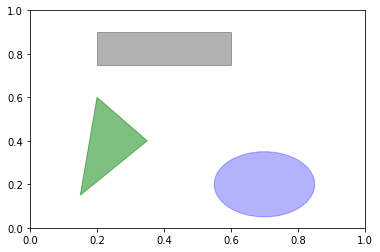

In [57]:
fig

In [58]:
fig.savefig('figpath.svg')

In [59]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [60]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [64]:
#plt.rc('figure', figsize=(10, 10))
# default size: (6, 4)
plt.rc('figure', figsize=(6, 4))

## Plotting functions in pandas

### Line plots

In [62]:
plt.close('all')

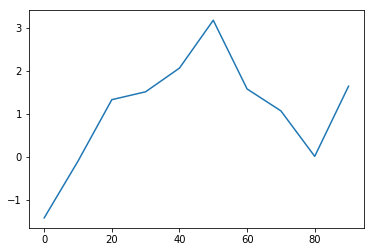

In [63]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

In [ ]:
df.plot()

### Bar plots

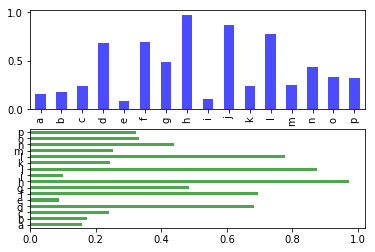

In [65]:
fig, axes = plt.subplots(2, 1)
#list('문자열')은 문자열을 char로 나눠서 저장
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
#kind=bar는 막대그래프, 
data.plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
#barh는 수평 막대그래프임
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.7)

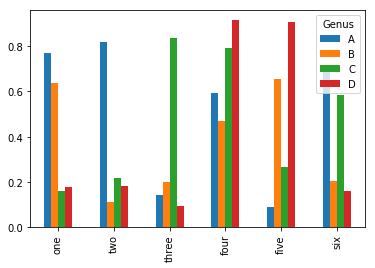

In [66]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [ ]:
#plt.figure()

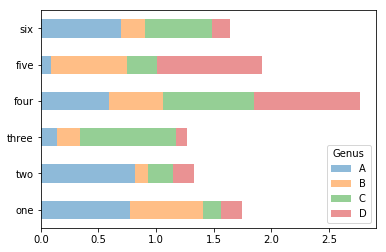

In [67]:
#stacked는 누적값으로 표현함
df.plot(kind='barh', stacked=True, alpha=0.5)

In [71]:
InteractiveShell.ast_node_interactivity = 'all'

In [72]:
tips = pd.read_csv('ch08/tips.csv')
#party_counts = pd.crosstab(tips.day, tips.size)  # tips.size 에서 오류
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts
# Not many 1- and 6-person parties
#party_counts = party_counts.ix[:, 2:5]
party_counts = party_counts.loc[:, 2:5]    # 여기서 2:5는 index가 아니고 label임, 5도 포함됨
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


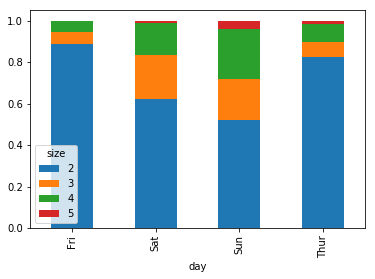

In [73]:
# Normalize to sum to 1
#party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

In [ ]:
#plt.figure()

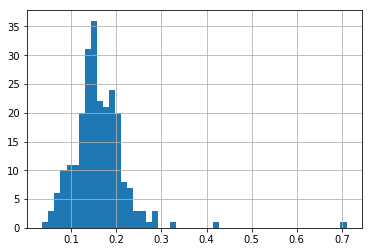

In [76]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [ ]:
#plt.figure()

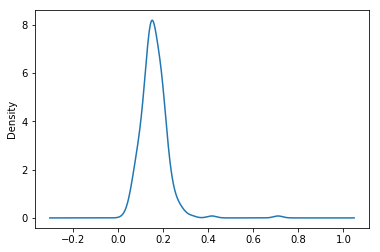

In [79]:
#실행안되면 prompt에 conda install scipy -n=da36 하면 됨.
tips['tip_pct'].plot(kind='kde')

In [ ]:
#plt.figure()

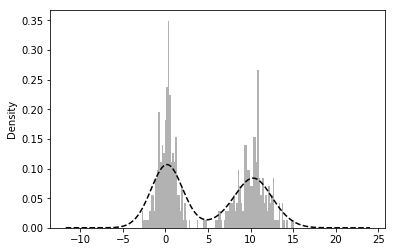

In [78]:
#평균이 0이고 표준편차가 1이고 사이즈가 200인걸 만듦.
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [80]:
macro = pd.read_csv('ch08/macrodata.csv')
macro.tail(5)    # 추가
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.tail(5)    # 추가
trans_data = np.log(data).diff().dropna()
trans_data[-5:]
trans_data.tail(5)    # 추가

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


,cpi,m1,tbilrate,unemp
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2
202,216.385,1673.9,0.12,9.6


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
#plt.figure()

Text(0.5,1,'Changes in log m1 vs. log unemp')

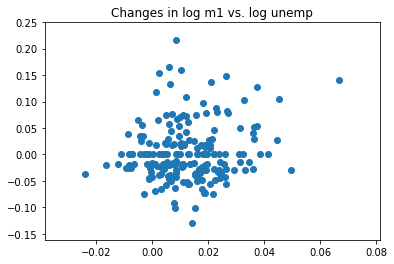

In [81]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

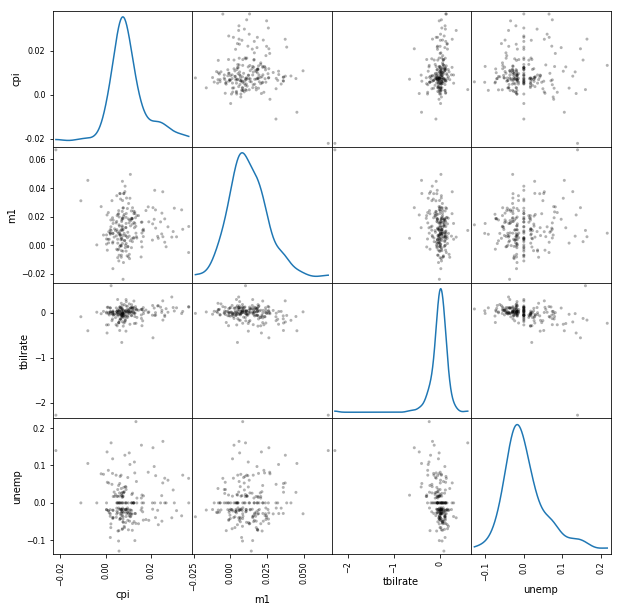

In [82]:
plt.rc('figure', figsize=(10, 10))
#pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)   # 변경
plt.rc('figure', figsize=(6, 4));

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [83]:
data = pd.read_csv('ch08/Haiti.csv')
data[:5]
data.info()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [84]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [85]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [86]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [87]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]
data.head(5)
data.info()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3569 non-null int64
INCIDENT TITLE    3569 non-null object
INCIDENT DATE     3569 non-null object
LOCATION          3568 non-null object
DESCRIPTION       3569 non-null object
CATEGORY          3569 non-null object
LATITUDE          3569 non-null float64
LONGITUDE         3569 non-null float64
APPROVED          3569 non-null object
VERIFIED          3569 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 306.7+ KB


In [88]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [89]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [90]:
data.CATEGORY.head(5)

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
Name: CATEGORY, dtype: object

In [91]:
all_cats = get_all_categories(data.CATEGORY)
all_cats[:5]
len(all_cats)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire']

47

'Food Shortage'

'Earthquake and aftershocks'

In [92]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
all_codes[:10]
code_index = pd.Index(np.unique(all_codes))
code_index
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)
dummy_frame.info()

['1', '1a', '1b', '1c', '1d', '2', '2a', '2b', '2c', '2c']

Index(['1', '1a', '1b', '1c', '1d', '2', '2a', '2b', '2c', '2d', '2e', '2f',
       '3', '3a', '3b', '3c', '3d', '3e', '4', '4a', '4c', '4e', '5', '5a',
       '5b', '5c', '5d', '5e', '6', '6a', '6b', '6c', '7', '7a', '7b', '7c',
       '7d', '7g', '7h', '8', '8a', '8c', '8d', '8e', '8f'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 45 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
2a    3569 non-null float64
2b    3569 non-null float64
2c    3569 non-null float64
2d    3569 non-null float64
2e    3569 non-null float64
2f    3569 non-null float64
3     3569 non-null float64
3a    3569 non-null float64
3b    3569 non-null float64
3c    3569 non-null float64
3d    3569 non-null float64
3e    3569 non-null float64
4     3569 non-null float64
4a    3569 non-null float64
4c    3569 non-null float64
4e    3569 non-null float64
5     3569 non-null float64
5a    3569 non-null float64
5b    3569 non-null float64
5c    3569 non-null float64
5d    3569 non-null float64
5e    3569 non-null float64
6     3569 non-null float64
6a    3569 non-null float64
6b    3569 non-null float64
6c    3569 non-null float

In [93]:
len(all_codes)
len(np.unique(all_codes))

47

45

In [94]:
dummy_frame.head()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
#dummy_frame.ix[:, :6].info()
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [103]:
data.index[:5]
data.CATEGORY.head()

Int64Index([0, 4, 5, 6, 7], dtype='int64')

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
Name: CATEGORY, dtype: object

In [104]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    #dummy_frame.ix[row, codes] = 1
    dummy_frame.loc[row, codes] = 1
dummy_frame.head()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
data = data.join(dummy_frame.add_prefix('category_'))
data.head(5)

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#data.ix[:, 10:15].info()
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


In [107]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

ImportError: cannot import name 'Basemap'

NameError: name 'basic_haiti_map' is not defined

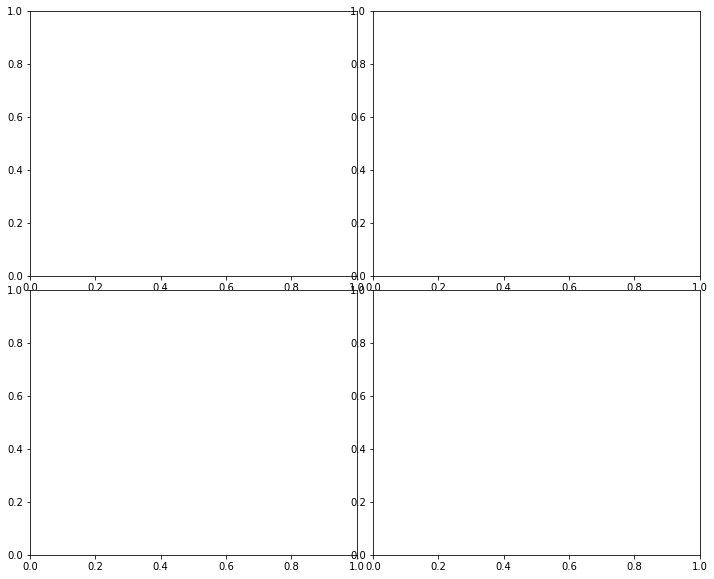

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'r.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        
make_plot()        

In [ ]:
plt.rc('figure', figsize=(12, 10))
fig = plt.figure()
cat_data = data[data['category_2a'] == 1]
lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

m = basic_haiti_map(lllat=33, urlat=39,
                    lllon=125, urlon=133)
#shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
#m.readshapefile(shapefile_path, 'roads')
x, y = m(lons.values, lats.values)

m.plot(x, y, 'k.', alpha=0.5)
fig.get_axes()[0].set_title('Food shortages reported in Port-au-Prince')